In [1]:
import ctypes, win32gui, win32ui
from PIL import Image, ImageGrab

import time
time.sleep(10)
def get_cursor():
    hcursor = win32gui.GetCursorInfo()[1]
    hdc = win32ui.CreateDCFromHandle(win32gui.GetDC(0))
    hbmp = win32ui.CreateBitmap()
    hbmp.CreateCompatibleBitmap(hdc, 36, 36)
    hdc = hdc.CreateCompatibleDC()
    hdc.SelectObject(hbmp)
    hdc.DrawIcon((0,0), hcursor)
    
    bmpinfo = hbmp.GetInfo()
    bmpstr = hbmp.GetBitmapBits(True)
    cursor = Image.frombuffer('RGB', (bmpinfo['bmWidth'], bmpinfo['bmHeight']), bmpstr, 'raw', 'BGRX', 0, 1).convert("RGBA")
    
    win32gui.DestroyIcon(hcursor)    
    win32gui.DeleteObject(hbmp.GetHandle())
    hdc.DeleteDC()


    pixdata = cursor.load()


    width, height = cursor.size
    for y in range(height):
        for x in range(width):

            if pixdata[x, y] == (0, 0, 0, 255):
                pixdata[x, y] = (0, 0, 0, 0)


    hotspot = win32gui.GetIconInfo(hcursor)[1:3]

    return (cursor, hotspot)

cursor, (hotspotx, hotspoty) = get_cursor()
cursor.save("cursor.png")


ratio = ctypes.windll.shcore.GetScaleFactorForDevice(0) / 100

img = ImageGrab.grab(bbox=None, include_layered_windows=True)

pos_win = win32gui.GetCursorPos()
pos = (round(pos_win[0]*ratio - hotspotx), round(pos_win[1]*ratio - hotspoty))


img.paste(cursor, pos, cursor)

img.save("screenshot.png")

In [ ]:
import time
from fastapi import FastAPI
from starlette.responses import StreamingResponse
import nest_asyncio
nest_asyncio.apply()
app = FastAPI()
import asyncio

async def generate_data():



    while True:
        if yes==False:
            await asyncio.sleep(0.01)
        else:
                
            yield b"11\n"
            await asyncio.sleep(7)  # Continue sending True every 7 seconds
async def yes():
    global yes
    yes = False
    two_minutes = 60 * 2.5  # Convert minutes to seconds
    # two_minutes = 60 * 0.1
    await asyncio.sleep(two_minutes)
    yes = True
@app.get("/stream")
async def stream_data():
    return StreamingResponse(generate_data(), media_type="text/plain")

if __name__ == "__main__":
    import uvicorn
    asyncio.create_task(yes())
    uvicorn.run(app, host="localhost", port=9999)


INFO:     Started server process [10880]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://localhost:9999 (Press CTRL+C to quit)


INFO:     ::1:51235 - "GET /stream HTTP/1.1" 200 OK
INFO:     ::1:51286 - "GET /stream HTTP/1.1" 200 OK
INFO:     ::1:51297 - "GET /stream HTTP/1.1" 200 OK


Mouse position: Point(x=979, y=636)


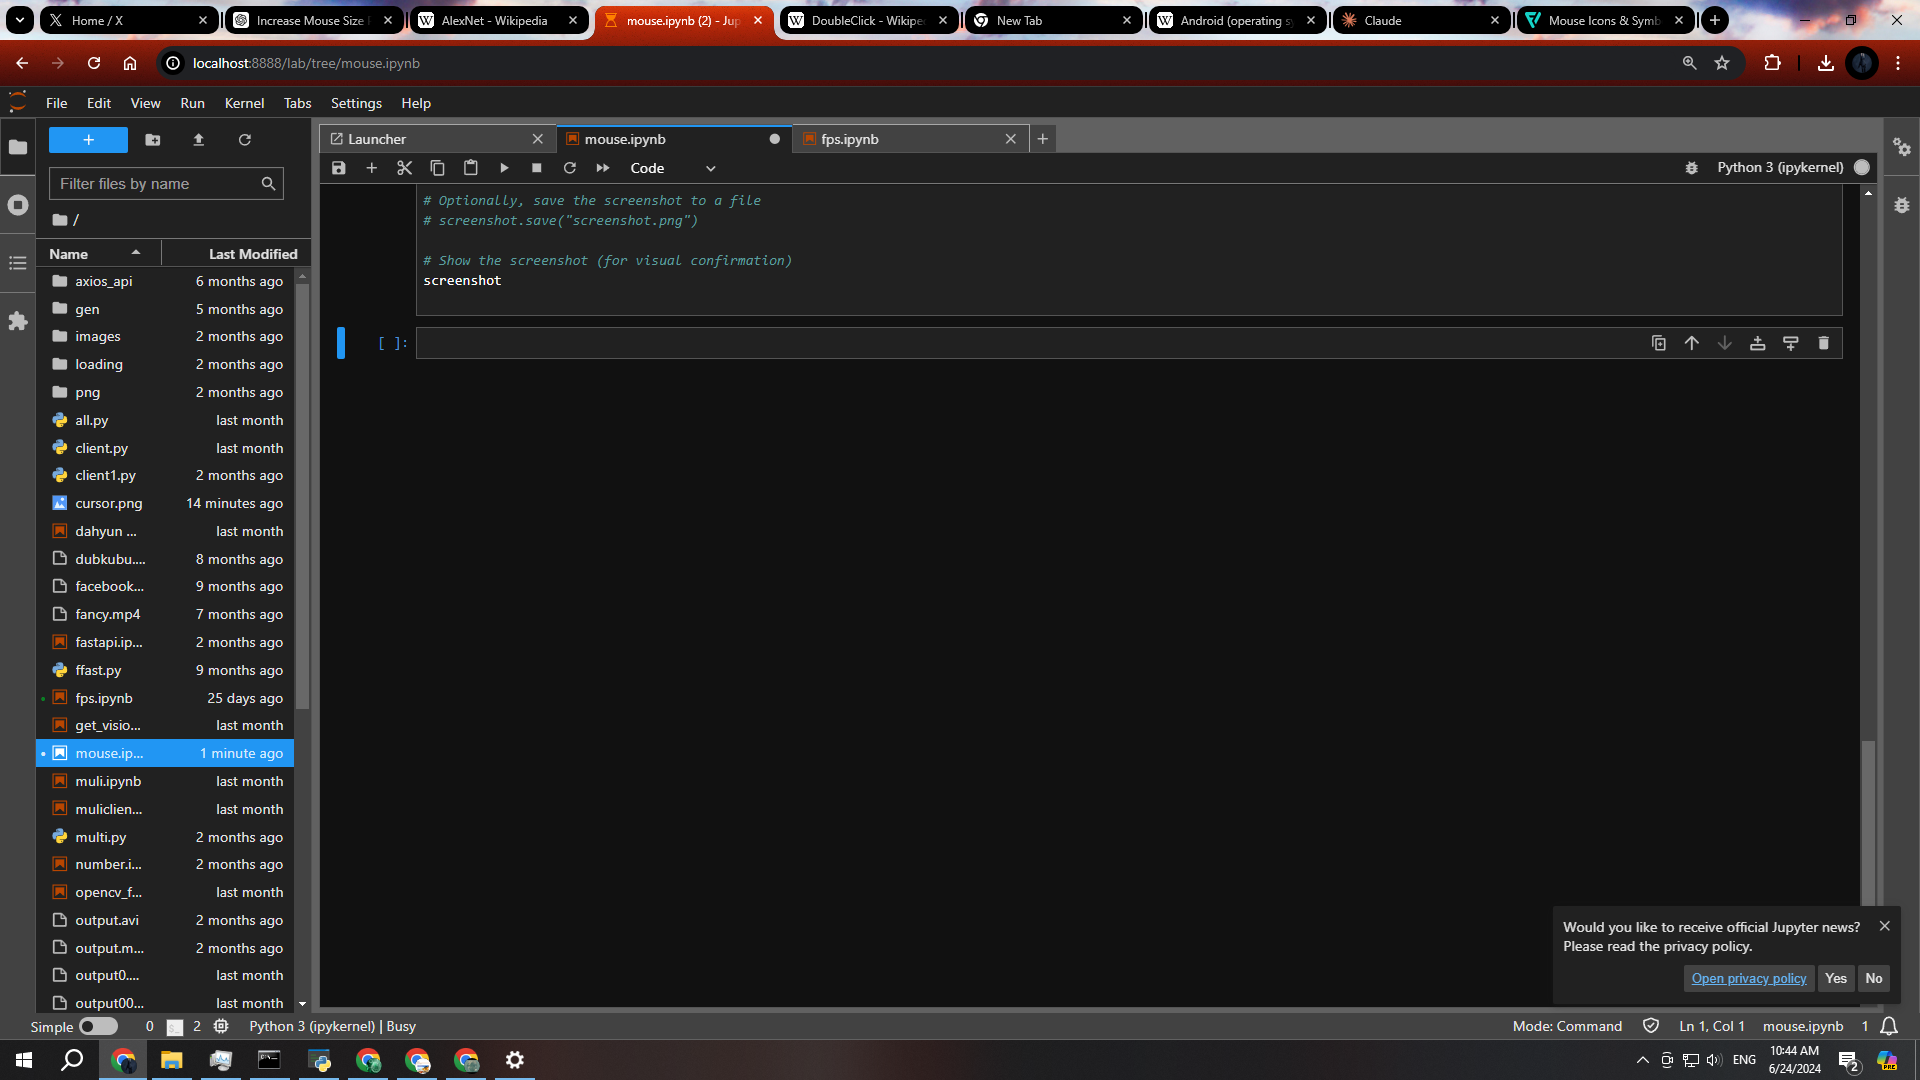

In [6]:
from PIL import ImageGrab
import pyautogui

# Get the current mouse cursor position
mouse_position = pyautogui.position()
print(f"Mouse position: {mouse_position}")

# Capture the screen
screenshot = ImageGrab.grab()


# Show the screenshot (for visual confirmation)
screenshot


In [16]:
from PIL import ImageGrab, Image
import pyautogui
import time
time.sleep(5)
s = time.time()
# Get the current mouse cursor position
mouse_position = pyautogui.position()
print(f"Mouse position: {mouse_position}")

# Capture the screen
screenshot = ImageGrab.grab()

# Load the mouse icon image
mouse_icon = Image.open("mouse_icon.png")

# Resize the mouse icon image
n = 50
new_size = (n,n)  # Set the desired size
mouse_icon = mouse_icon.resize(new_size, Image.ANTIALIAS)

# Get the dimensions of the resized mouse icon image
icon_width, icon_height = mouse_icon.size

# Calculate the position to paste the mouse icon (adjust to center the icon)
icon_position = (mouse_position.x - icon_width // 2, mouse_position.y - icon_height // 2)

# Paste the mouse icon onto the screenshot
screenshot.paste(mouse_icon, icon_position, mouse_icon)
e = time.time()
r = e-s
print(f'total {r}')
# # Show the screenshot (for visual confirmation)
# screenshot

Mouse position: Point(x=1727, y=243)
total 0.07565999031066895


C:\Users\ALL USER\AppData\Local\Temp\ipykernel_9492\2480095309.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mouse_icon = mouse_icon.resize(new_size, Image.ANTIALIAS)


In [17]:
from PIL import ImageGrab, Image
import pyautogui
import time
time.sleep(5)
s = time.time()
# Get the current mouse cursor position
mouse_position = pyautogui.position()
print(f"Mouse position: {mouse_position}")

# Capture the screen
screenshot = ImageGrab.grab()

# # Load the mouse icon image
# mouse_icon = Image.open("mouse_icon.png")

# # Resize the mouse icon image
# n = 50
# new_size = (n,n)  # Set the desired size
# mouse_icon = mouse_icon.resize(new_size, Image.ANTIALIAS)

# # Get the dimensions of the resized mouse icon image
# icon_width, icon_height = mouse_icon.size

# # Calculate the position to paste the mouse icon (adjust to center the icon)
# icon_position = (mouse_position.x - icon_width // 2, mouse_position.y - icon_height // 2)

# # Paste the mouse icon onto the screenshot
# screenshot.paste(mouse_icon, icon_position, mouse_icon)
e = time.time()
r = e-s
print(f'total {r}')
# # Show the screenshot (for visual confirmation)
# screenshot

Mouse position: Point(x=412, y=627)
total 0.05907249450683594


In [20]:
from mss import mss
from PIL import Image
import pyautogui
import time

time.sleep(5)

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 50
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

# Create an mss instance
sct = mss()

def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
    sct_img = sct.grab(monitor)
    screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot

# Run the function
result = capture_screen_with_mouse()

Mouse position: (1127, 302)
total 0.06778550148010254


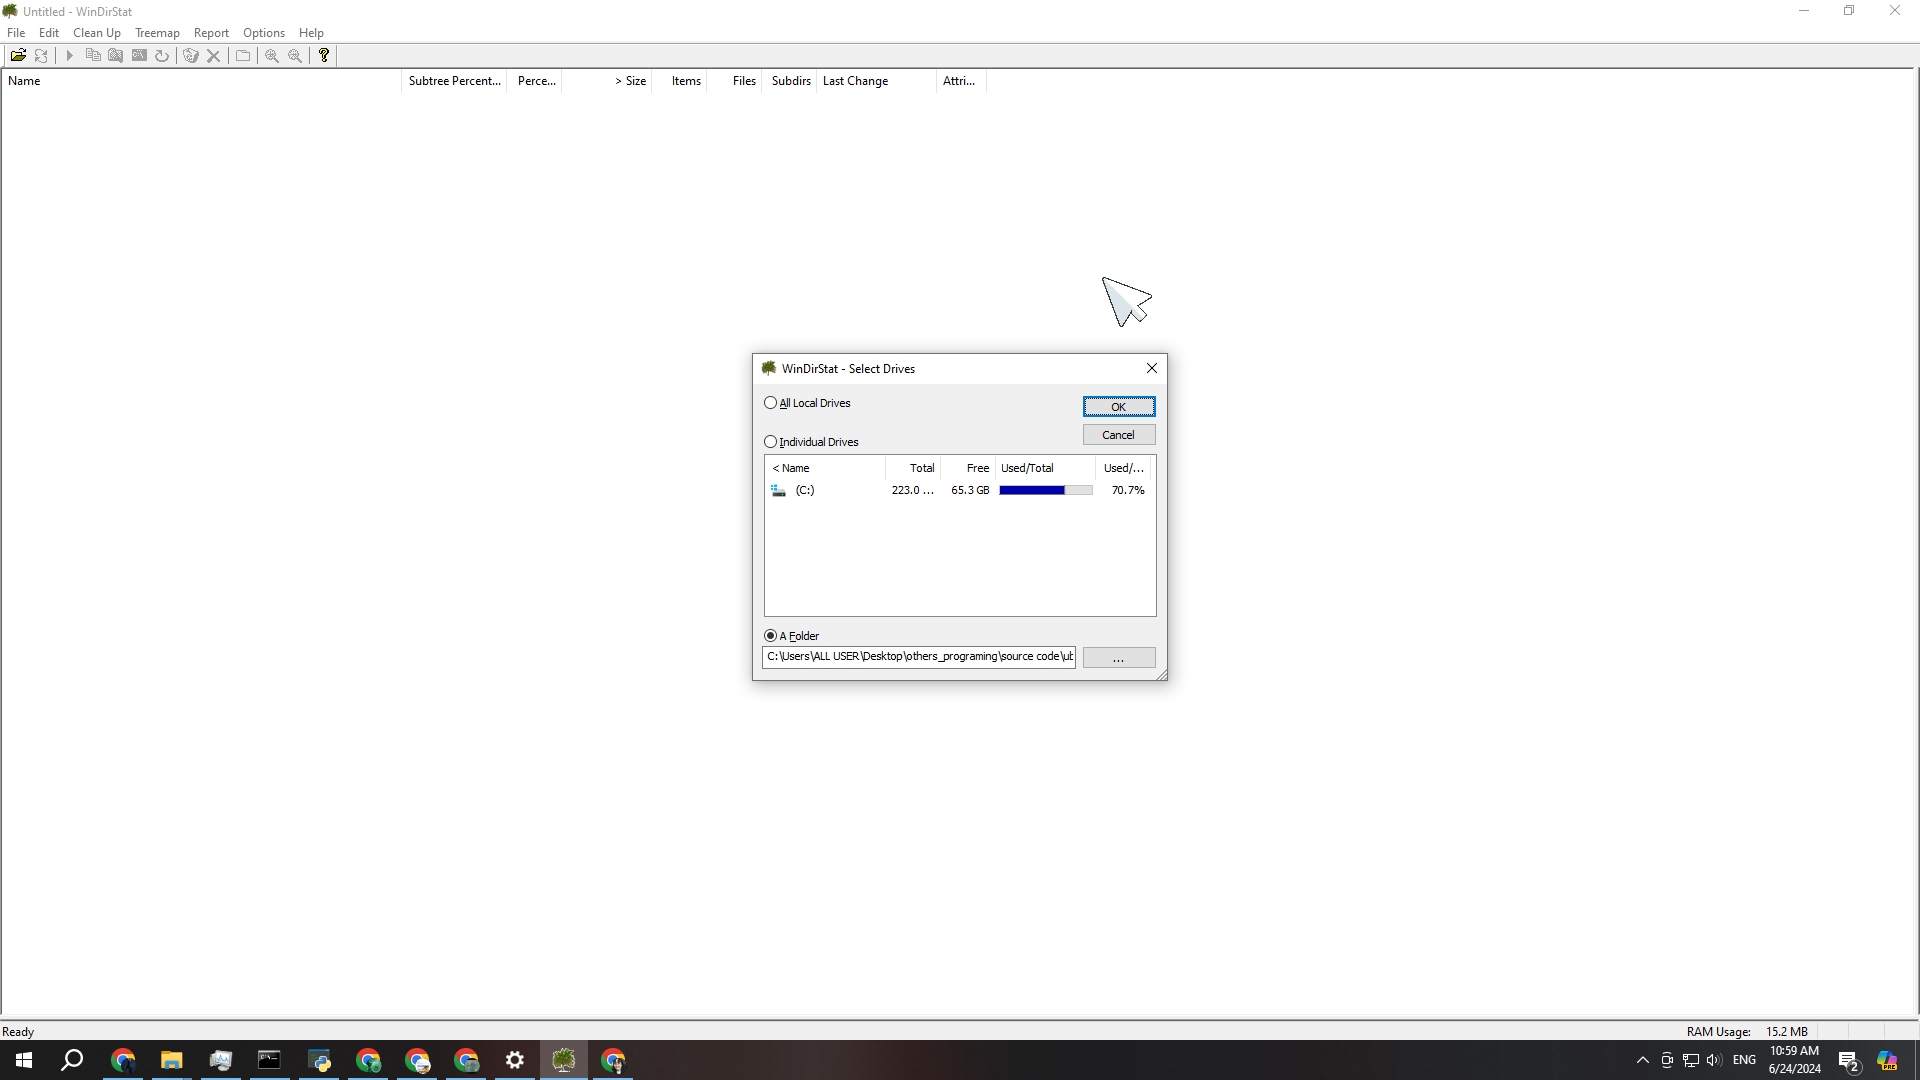

In [21]:
result

In [23]:
from mss import mss
from PIL import Image
import pyautogui
import time

time.sleep(5)

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 50
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    with mss() as sct:
        monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
        sct_img = sct.grab(monitor)
        screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot

# Run the function
result = capture_screen_with_mouse()

Mouse position: (845, 626)
total 0.06452322006225586


Mouse position: (1501, 433)
total 0.06877398490905762


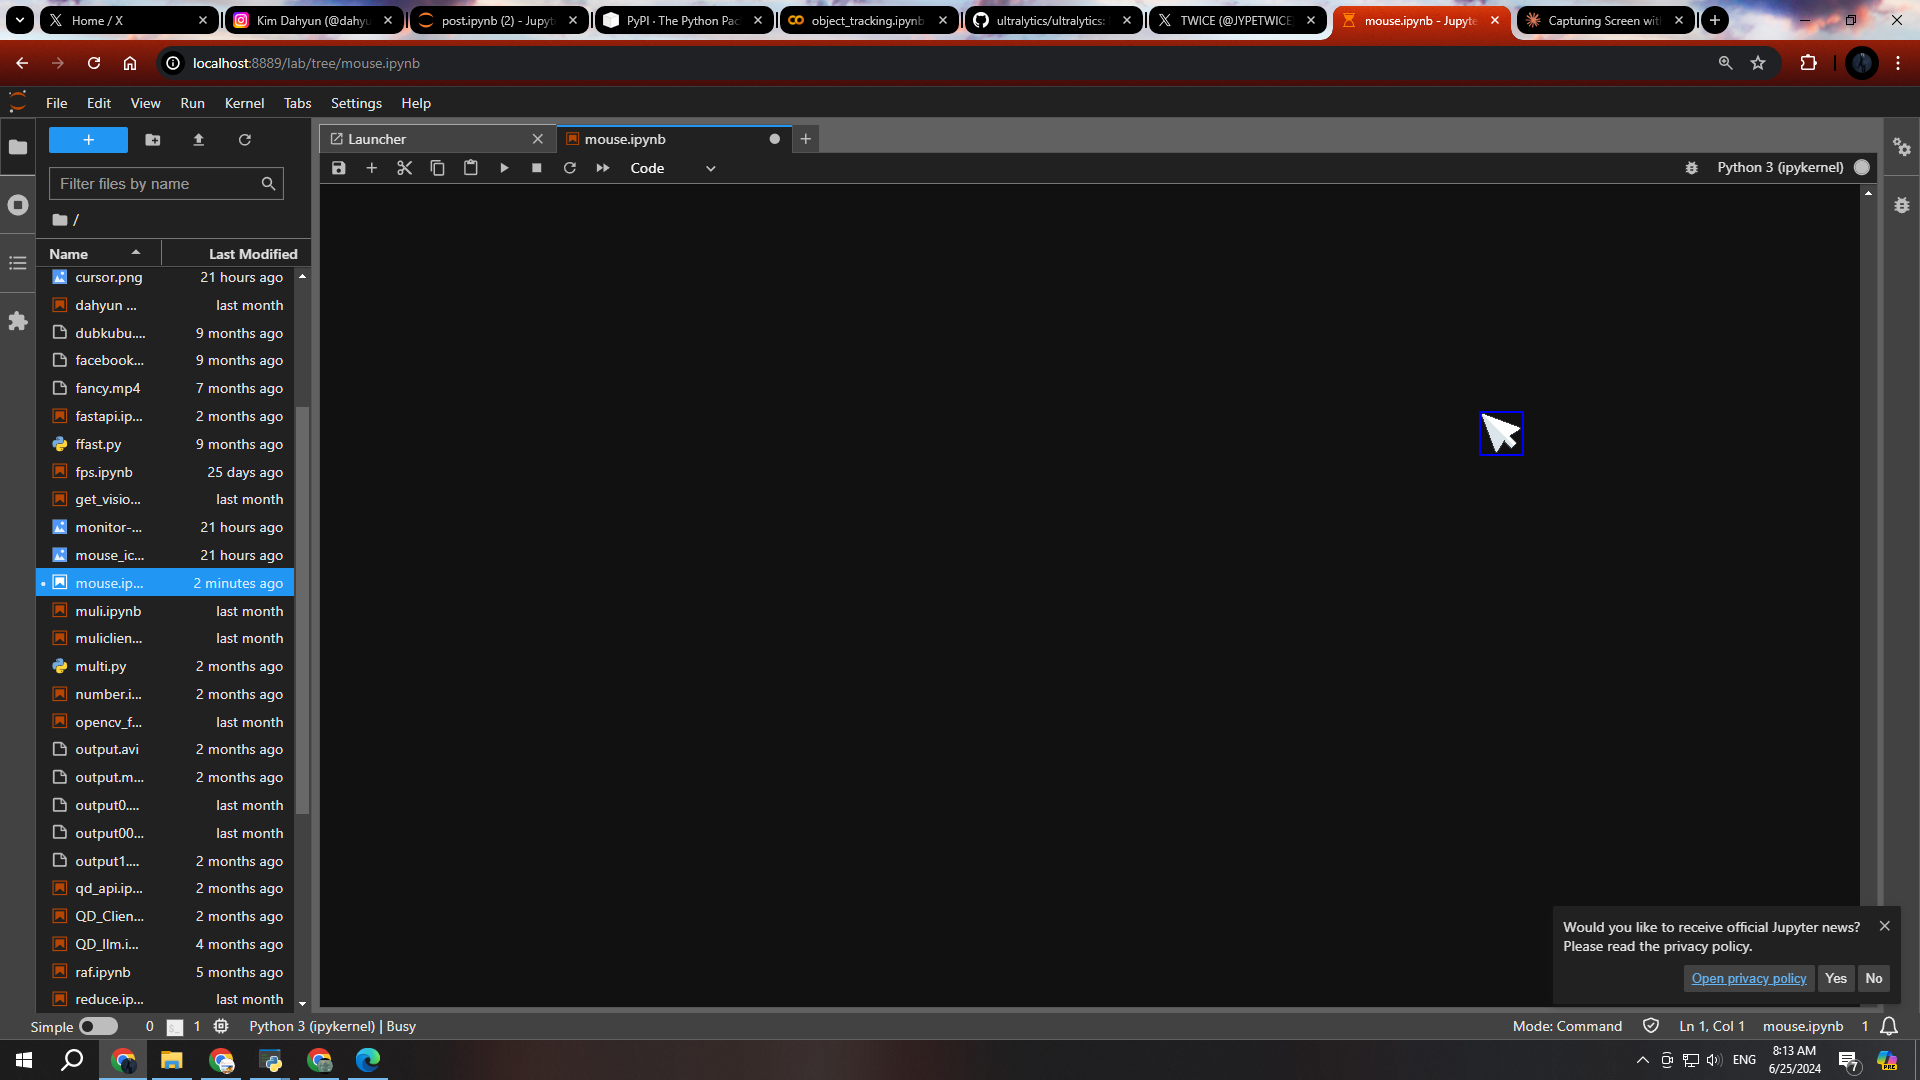

In [3]:
from mss import mss
from PIL import Image, ImageDraw
import pyautogui
import time

time.sleep(5)

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 40
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

# Create an mss instance
sct = mss()

def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
    sct_img = sct.grab(monitor)
    screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Create a drawing context
    draw = ImageDraw.Draw(screenshot)
    
    # Draw a black rectangle around the mouse icon
    box_padding = 2  # Adjust this value to change the thickness of the box
    box_position = (
        icon_position[0] - box_padding,
        icon_position[1] - box_padding,
        icon_position[0] + icon_width + box_padding,
        icon_position[1] + icon_height + box_padding
    )
    draw.rectangle(box_position, outline="blue", width=box_padding)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot

# Run the function
result = capture_screen_with_mouse()
result

Mouse position: (1398, 551)
total 0.0539705753326416


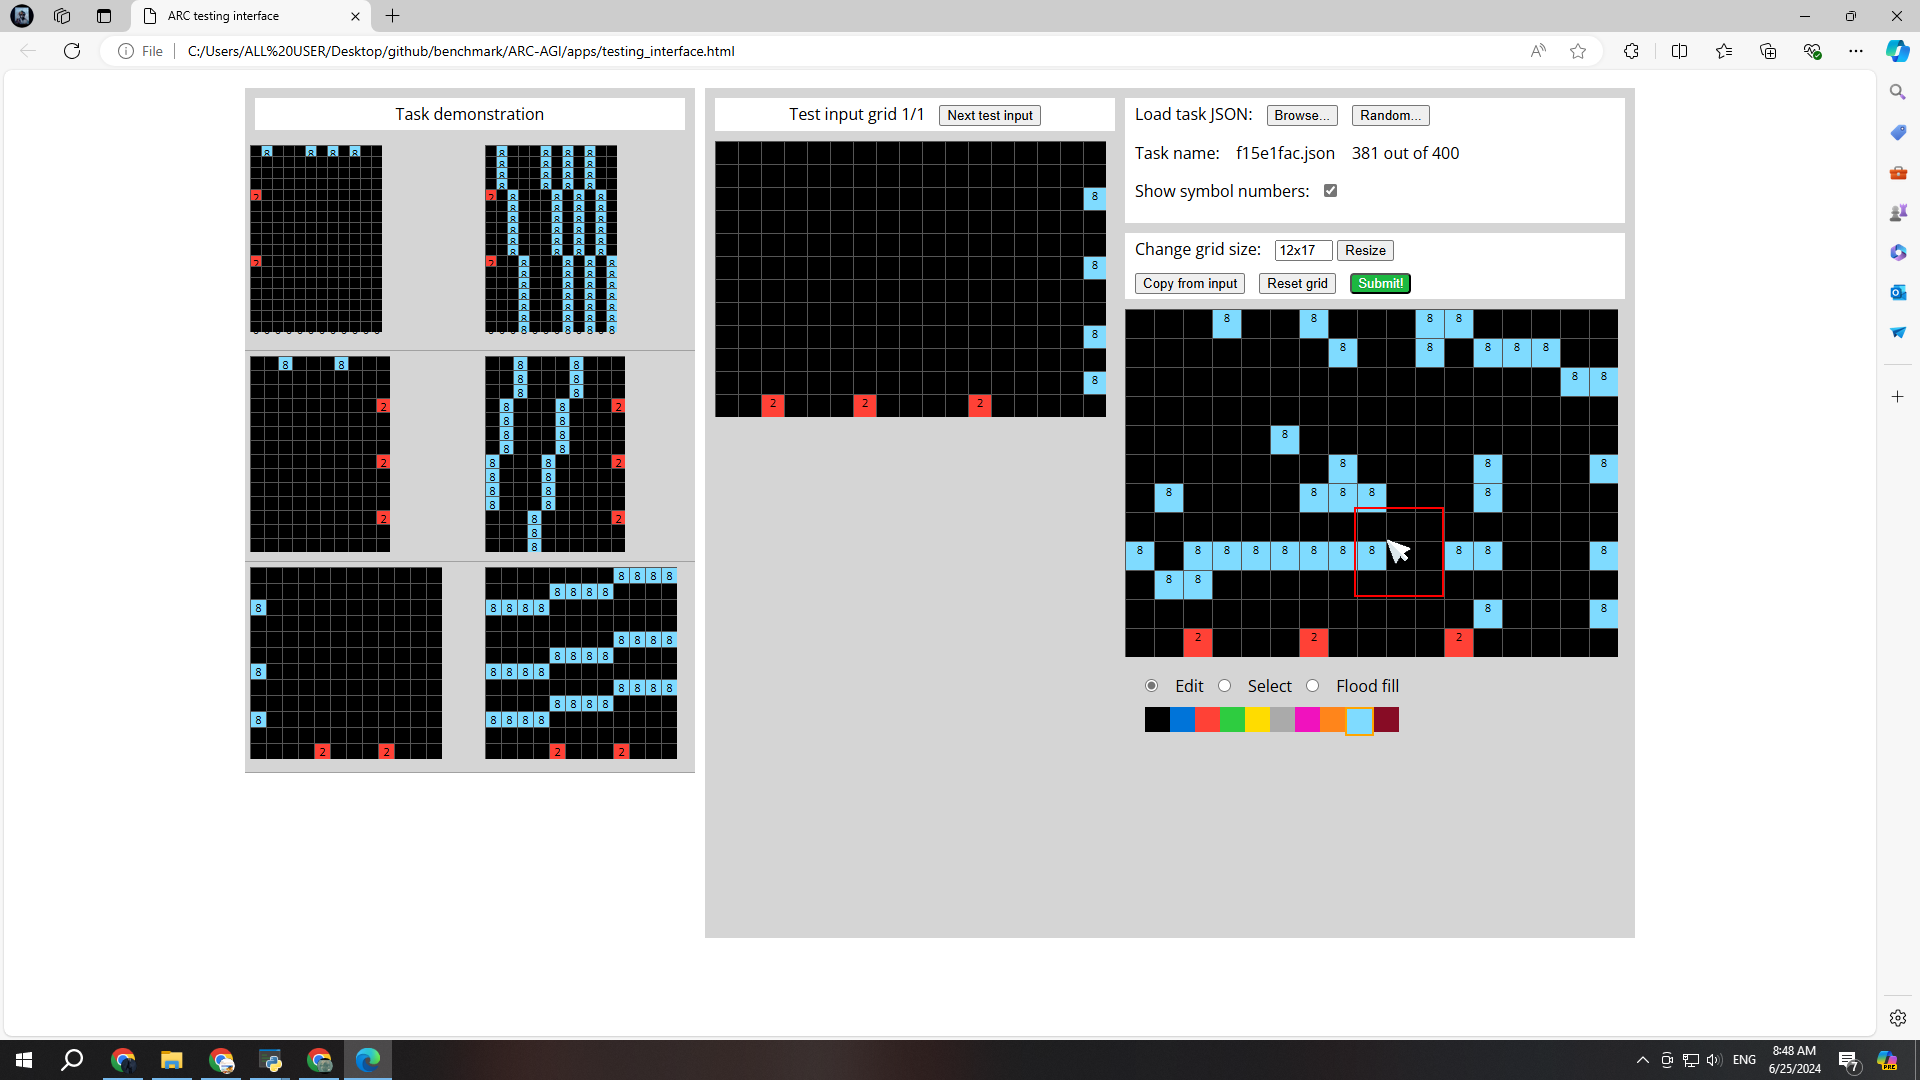

In [11]:
from mss import mss
from PIL import Image, ImageDraw
import pyautogui
import time

# Wait for 5 seconds before starting
time.sleep(5)

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 26
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

# Create an mss instance
sct = mss()

def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
    sct_img = sct.grab(monitor)
    screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Create a drawing context
    draw = ImageDraw.Draw(screenshot)
    
    # Draw the inner blue rectangle around the mouse icon
    box_padding = 2  # Adjust this value to change the thickness of the box
    inner_box_position = (
        icon_position[0] - box_padding,
        icon_position[1] - box_padding,
        icon_position[0] + icon_width + box_padding,
        icon_position[1] + icon_height + box_padding
    )
    # draw.rectangle(inner_box_position, outline="blue", width=box_padding)
    
    # Draw the outer rectangle 30 pixels away from the inner rectangle
    outer_padding = 30
    outer_box_position = (
        inner_box_position[0] - outer_padding,
        inner_box_position[1] - outer_padding,
        inner_box_position[2] + outer_padding,
        inner_box_position[3] + outer_padding
    )
    draw.rectangle(outer_box_position, outline="red", width=box_padding)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot

# Run the function
result = capture_screen_with_mouse()

# Display or save the result
result

In [ ]:
f15e1

In [7]:
import pyautogui
import time
# Optional: pause to see the movement
time.sleep(5)

# Define the position
x, y = 1398, 551
x, y = 1398, 551-190
# Move the mouse to the position
pyautogui.moveTo(x, y, duration=0.1)  # duration is optional, it makes the move smooth


# Click at the position
pyautogui.click()
